In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## 1. Read the dataset
###        1.1 lookout for missing values
###        1.2 report differences between mean and median in the features

In [2]:
data = pd.read_csv("Diabetes.csv")

In [3]:
data.head()

,No. of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.rename(columns = {'No. of times pregnant':'pregnant_times',
                       'Plasma glucose concentration':'plasma_glucose_concentration',
                       'Diastolic blood pressure (mm Hg)':'Diastolic_blood_pressure',
                       'Triceps skin fold thickness (mm)':'skin_thickness',
                       '2-Hour serum insulin (mu U/ml)':'insulin',
                       'Body mass index (weight in kg/(height in m)^2)':'BMI',
                       'Diabetes pedigree function':'diabetes_function_level',
                       'Age (years)':'age',
                       'Class variable (0 or 1)':'output'}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pregnant_times                768 non-null    int64  
 1   plasma_glucose_concentration  768 non-null    int64  
 2   Diastolic_blood_pressure      768 non-null    int64  
 3   skin_thickness                768 non-null    int64  
 4   insulin                       768 non-null    int64  
 5   BMI                           768 non-null    float64
 6   diabetes_function_level       768 non-null    float64
 7   age                           768 non-null    int64  
 8   output                        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.shape

(768, 9)

In [7]:
data.describe()

,pregnant_times,plasma_glucose_concentration,Diastolic_blood_pressure,skin_thickness,insulin,BMI,diabetes_function_level,age,output
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
duplicate_rows = data[data.duplicated()]
if not duplicate_rows.empty:
    data.drop_duplicates(inplace=True)
data.shape

(768, 9)

In [9]:
print(data.isnull().sum())

pregnant_times                  0
plasma_glucose_concentration    0
Diastolic_blood_pressure        0
skin_thickness                  0
insulin                         0
BMI                             0
diabetes_function_level         0
age                             0
output                          0
dtype: int64


In [10]:
# Checking for any columns have value as 0. since many rows have value 0, we can't remove all such rows. 
# In addition we can replace 0 with mean or median but the data looks too sensitive so not replacing as well.
columns_list = ["Diastolic_blood_pressure", "insulin", "BMI", "diabetes_function_level"]
for column in columns_list:
    index_list = data[data[column] == 0].index.values
    if len(index_list) != 0:
        print("Column name {} and zero_rows_count {}".format(column, len(index_list)))

Column name Diastolic_blood_pressure and zero_rows_count 35
Column name insulin and zero_rows_count 374
Column name BMI and zero_rows_count 11


## 2. Visualize the feature relationships
###      2.1 Pairwise Plot
###      2.2 Heatmap

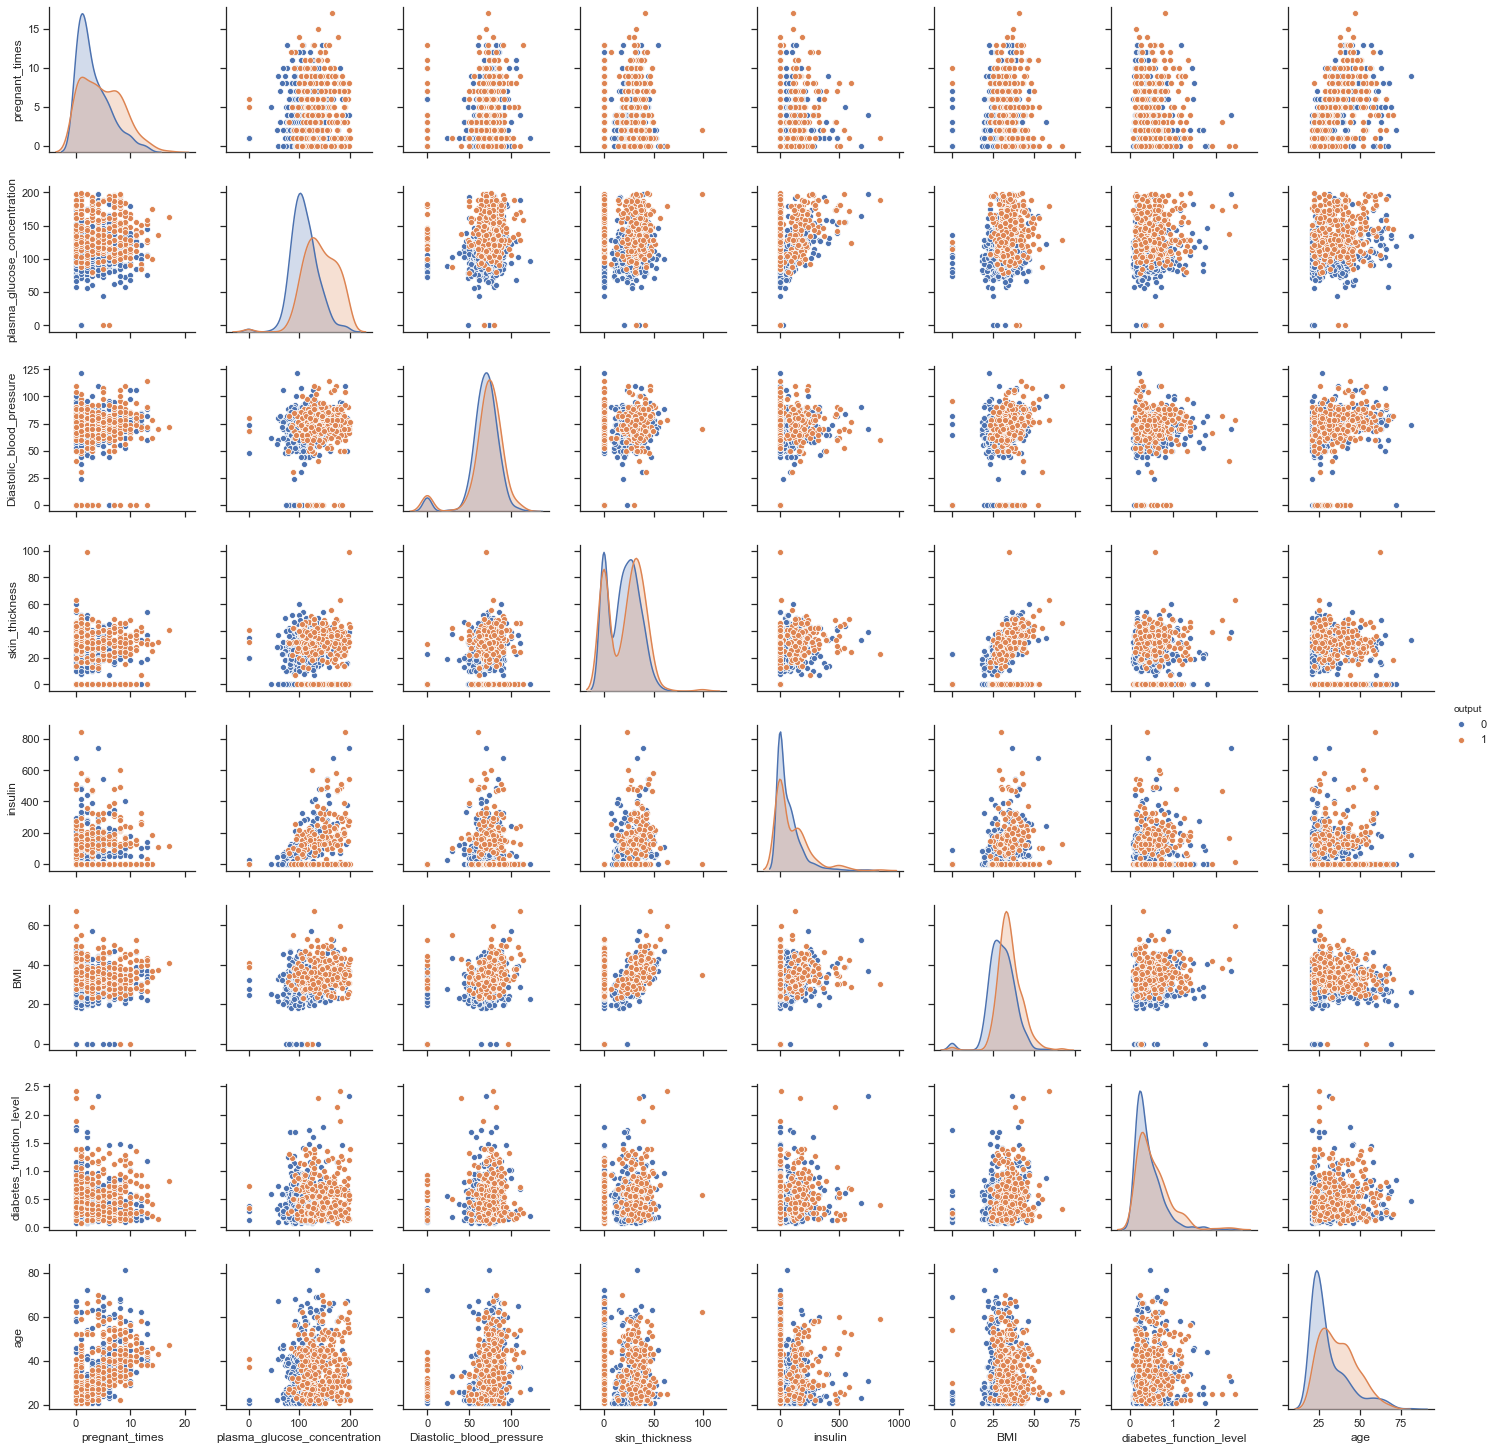

In [11]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="output")

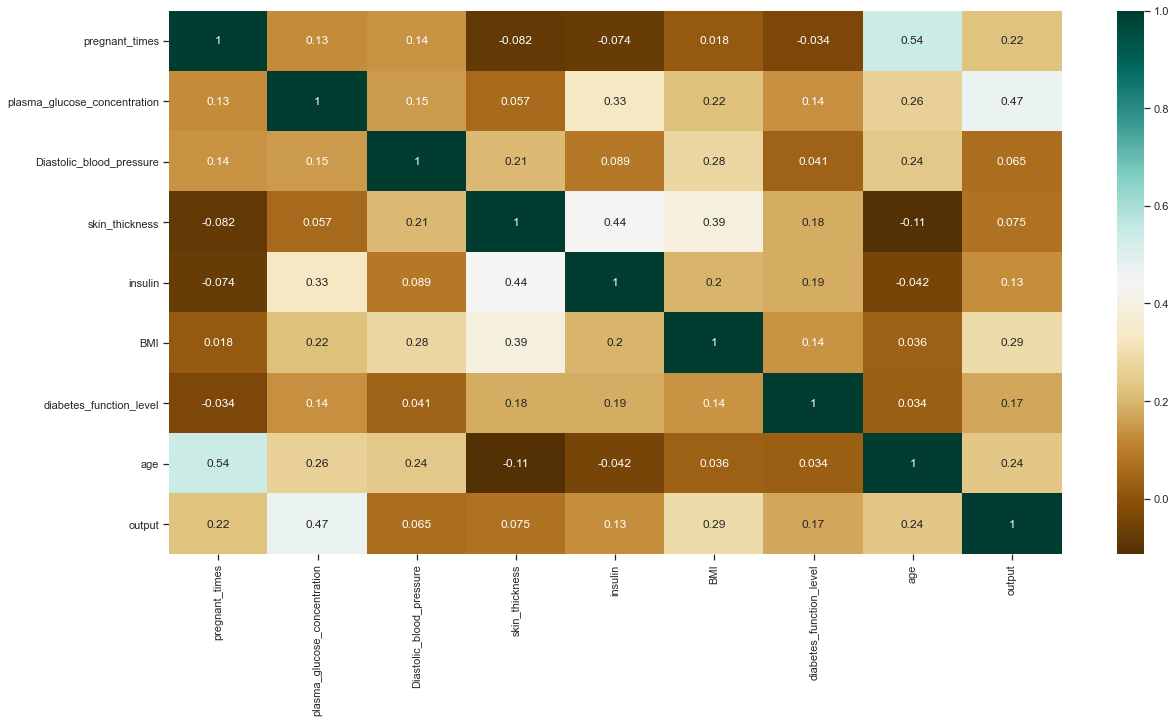

In [12]:
plt.figure(figsize=(20,10))
h = data.corr()
sns.heatmap(h,cmap="BrBG", annot=True)

## 3. Split the Data
###     3.1 Divide into features and target
###     3.2 Divide into training and testing
###     3.3 Ensure that data is divided with more or less equal ration of class 1 and 0 in both test and train set.

In [13]:
X= np.array(data.drop(['output'], 1))
y = np.array(data['output'])

In [14]:
x_min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.0001,1))
x_scaled = x_min_max_scaler.fit_transform(X)
x_scaled = np.log(x_scaled)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)

## 4. Implement the SVM Model
###    4.1 Scale the features
###    4.2 Train Model
###    4.3 Predict

In [16]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = svclassifier.predict(X_test)

## 5. Measure Accuracy
###     5.1 Confusion Matrix
###    5.2 Classification Report
###    5.3 Cross Tab with True and Predicted Labels

In [18]:
print(confusion_matrix(y_test,y_pred))


[[108  17]
 [ 26  41]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       125
           1       0.71      0.61      0.66        67

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192



In [20]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,108,17,125
1,26,41,67
All,134,58,192
